In [ ]:
# Observations
# (1) Urban city types equals about 2/3(62.7%) of the market share for Pyber. 
# (2) The number of rides in the urban far surpasses the number of rides in suburban and rural areas. With that said, the 
# average fares in urban areas are lower than that of the suburban and rural areas. All margins the same across the board would 
# make the urban area the most profitable area. 
# (3) Pyber should focus on increasing its market presence in the suburban and rural areas so it can increase its revenue and 
# therefore, increase its profits. 

In [47]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df = pd.merge(city_data, ride_data, on="city", how="left")

# Display the data table for preview
pyber_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


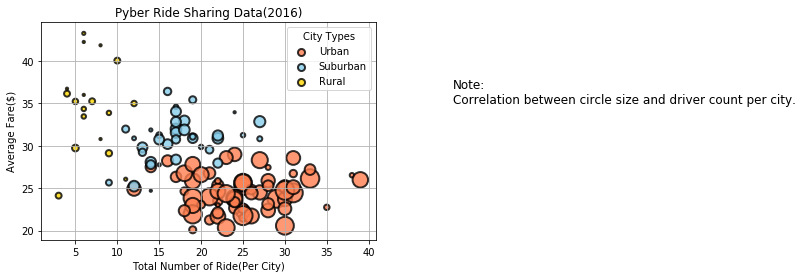

In [48]:
# Obtain the x and y coordinates for each of the three city types
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])

# Build the scatter plots for each city types
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

# Incorporate the other graph properties
plt.scatter(x_urban, y_urban, label="Urban", s=s_urban * 5, color="coral", edgecolor="black", alpha= 0.8, marker="o", linewidth= 2)
plt.scatter(x_suburban, y_suburban, label="Suburban", s=s_suburban * 5, color="skyblue", edgecolor="black", alpha= 0.8, marker="o", linewidth= 2)
plt.scatter(x_rural, y_rural, label="Rural", s=s_rural * 5, color="gold", edgecolor="black", alpha= 0.8, marker="o", linewidth= 2)
plt.grid()

plt.xlabel("Total Number of Ride(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")






# Create a legend
legend=plt.legend(fontsize= 10, title="City Types", loc="upper right")

# Incorporate a text label regarding circle size
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

plt.text(50,35, "Note:\nCorrelation between circle size and driver count per city.", fontsize = 12)

plt.savefig("..\Images\PyberrideSharingData.png")
# Save Figure
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

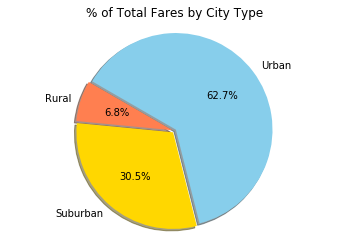

In [53]:
# Calculate Type Percents
total_fares=pyber_df.groupby("type")["fare"].sum()

# Build Pie Chart
labels = 'Rural','Suburban','Urban'
colors = ["coral","gold","skyblue"]
explode = ( 0.05,0.05, 0.05)
plt.title("% of Total Fares by City Type")
plt.pie(total_fares, explode = explode,autopct="%1.1f%%", colors = colors, labels=labels, startangle=150, shadow=True)
plt.axis("equal")

plt.savefig("..\Images\%ofTotalFaresbyCityType.png")


# Save Figure
plt.show

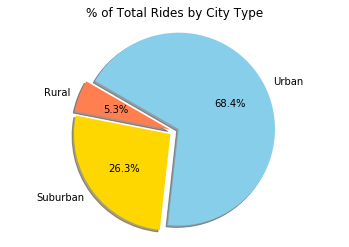

In [55]:
# Calculate Ride Percents
total_rides = pyber_df.groupby('type')['ride_id'].count()
total_rides
# Build Pie Chart
labels = 'Rural','Suburban','Urban'
colors = ["coral","gold","skyblue"]
explode = ( 0.05,0.05, 0.05)
plt.title("% of Total Rides by City Type")
plt.pie(total_rides, explode = explode,autopct="%1.1f%%", colors = colors, labels=labels, startangle=150, shadow=True)
plt.axis("equal")

plt.savefig("..\Images\%ofTotalRidesbyCityType.png")

# Save Figure
plt.show()

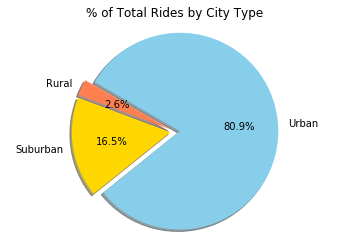

In [58]:
# Calculate Driver Percents
drivers_per_city_type=city_data.groupby(['type'])
sum_drivers= drivers_per_city_type["driver_count"].sum()



# Build Pie Charts
labels = 'Rural','Suburban','Urban'
colors = ["coral","gold","skyblue"]
explode = ( 0.05,0.05, 0.05)
plt.title("% of Total Rides by City Type")
plt.pie(sum_drivers, explode = explode,autopct="%1.1f%%", colors = colors, labels=labels, startangle=150, shadow=True)
plt.axis("equal")

plt.savefig("..\Images\%ofTotalRidesbyCityType.png")


# Save Figure
plt.show()